In [1]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import os

In [2]:
# fetching dataset - 1
df1 = pd.read_csv('EV Maker by Place.csv')
df1.head()

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [3]:
# fetching dataset - 2
df2 = pd.read_csv('ev_cat_01-24_2.csv')
df2.head()

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,2001-01-01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
1,2002-01-01,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
2,2003-01-01,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
3,2004-01-01,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0
4,2005-01-01,0,0,0,0,10,14,1,0,0,0,0,0,0,1,38,0


# Exploratory Data Analysis (EDA)

In [4]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)

DF1 Shape:  (62, 3)
DF2 Shape:  (283, 17)


In [5]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df2.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB
None
 <<< DATASET 2 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             283 non-null    object
 1   FOUR WHEELER (INVALID CARRIAGE)  283 non-null    int64 
 2   HEAVY GOODS VEHICLE              283 non-null    int64 
 3   HEAVY MOTOR VEHICLE              283 non-null    int64 
 4   HEAVY PASSENGER VEHICLE          283 

In [6]:
# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2)

'<<< DATASET 1 >>>'

,EV Maker,Place,State
count,62,62,62
unique,61,36,13
top,Lohia Auto Industries,Pune,Maharashtra
freq,2,7,15


'<<< DATASET 2 >>>'

,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.342756,2.169611,0.515901,28.731449,44.964664,637.208481,80.590106,0.109541,2.742049,0.173145,26.816254,5.293286,0.445230,6829.268551,8158.611307,47.558304
std,1.225834,12.068930,1.025695,79.088549,132.271583,1673.564172,237.983315,0.410864,10.360209,1.235578,67.653593,11.189004,2.073046,13720.345383,21546.263739,130.132199
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,8.000000,48.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,201.000000,0.000000
75%,0.000000,1.000000,1.000000,1.500000,28.500000,86.500000,24.000000,0.000000,0.000000,0.000000,18.500000,3.000000,0.000000,7634.500000,1433.500000,1.000000
max,10.000000,183.000000,6.000000,543.000000,1645.000000,7609.000000,1787.000000,4.000000,86.000000,20.000000,673.000000,70.000000,24.000000,60618.000000,137113.000000,863.000000


## _Analysis on locations of various EV manufacturers_

C:\Users\abhis\AppData\Local\Temp\ipykernel_17196\508115510.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")


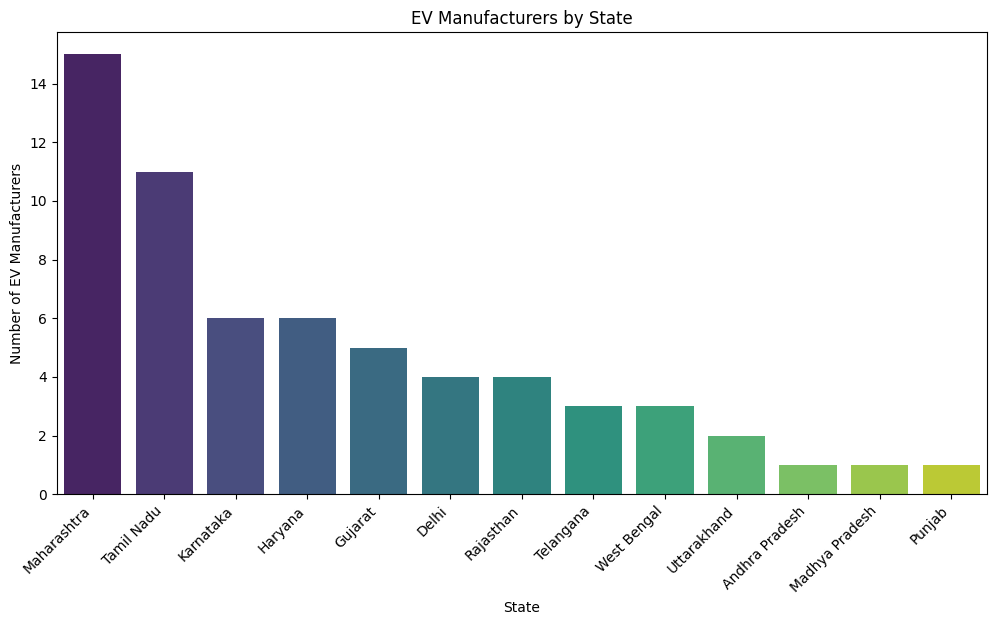

C:\Users\abhis\AppData\Local\Temp\ipykernel_17196\508115510.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette="coolwarm")


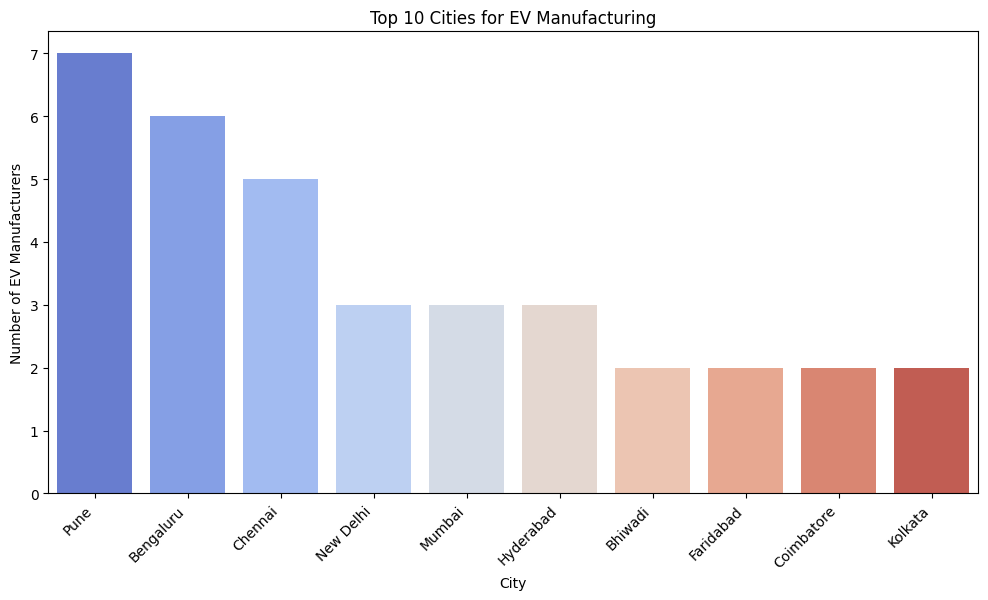

In [7]:
state_counts = df1["State"].value_counts()

# Count of EV manufacturers per city
city_counts = df1["Place"].value_counts()

# Plot bar chart for states
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Number of EV Manufacturers")
plt.title("EV Manufacturers by State")
plt.show()

# Plot bar chart for top cities
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index[:10], y=city_counts.values[:10], palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("City")
plt.ylabel("Number of EV Manufacturers")
plt.title("Top 10 Cities for EV Manufacturing")
plt.show()

In [8]:
state_counts, city_counts[:10]

(State
 Maharashtra       15
 Tamil Nadu        11
 Karnataka          6
 Haryana            6
 Gujarat            5
 Delhi              4
 Rajasthan          4
 Telangana          3
 West Bengal        3
 Uttarakhand        2
 Andhra Pradesh     1
 Madhya Pradesh     1
 Punjab             1
 Name: count, dtype: int64,
 Place
 Pune          7
 Bengaluru     6
 Chennai       5
 New Delhi     3
 Mumbai        3
 Hyderabad     3
 Bhiwadi       2
 Faridabad     2
 Coimbatore    2
 Kolkata       2
 Name: count, dtype: int64)

Maharashtra leads the EV manufacturing sector with 15 manufacturers, making it the top state for EV production. Tamil Nadu follows closely with 11 manufacturers, while Karnataka and Haryana each have six. Other significant states contributing to the industry include Gujarat, Delhi, Rajasthan, and Telangana, highlighting a strong regional presence of EV manufacturers across India.

Among cities, Pune emerges as the leading hub with seven manufacturers, followed by Bengaluru with six and Chennai with five. New Delhi also plays a crucial role, hosting three manufacturers. Other key cities in the EV landscape include Mumbai, Hyderabad, and Kolkata, reinforcing the diverse and widespread growth of EV manufacturing across major urban centers.

## _Analysis on the trends in EV registrations over time_

In [9]:
# Reassign column names explicitly to remove any hidden characters
df2.columns = [col.strip() for col in df2.columns]

# Retry date conversion
df2["Date"] = pd.to_datetime(df2["Date"], errors="coerce")

# Verify successful conversion
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             283 non-null    datetime64[ns]
 1   FOUR WHEELER (INVALID CARRIAGE)  283 non-null    int64         
 2   HEAVY GOODS VEHICLE              283 non-null    int64         
 3   HEAVY MOTOR VEHICLE              283 non-null    int64         
 4   HEAVY PASSENGER VEHICLE          283 non-null    int64         
 5   LIGHT GOODS VEHICLE              283 non-null    int64         
 6   LIGHT MOTOR VEHICLE              283 non-null    int64         
 7   LIGHT PASSENGER VEHICLE          283 non-null    int64         
 8   MEDIUM GOODS VEHICLE             283 non-null    int64         
 9   MEDIUM PASSENGER VEHICLE         283 non-null    int64         
 10  MEDIUM MOTOR VEHICLE             283 non-null    int64        

<Figure size 1200x600 with 0 Axes>

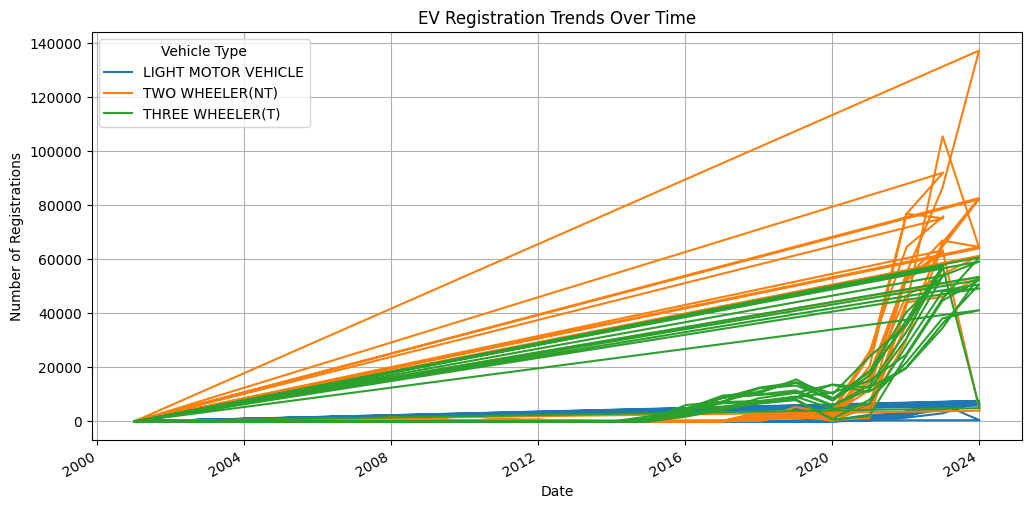

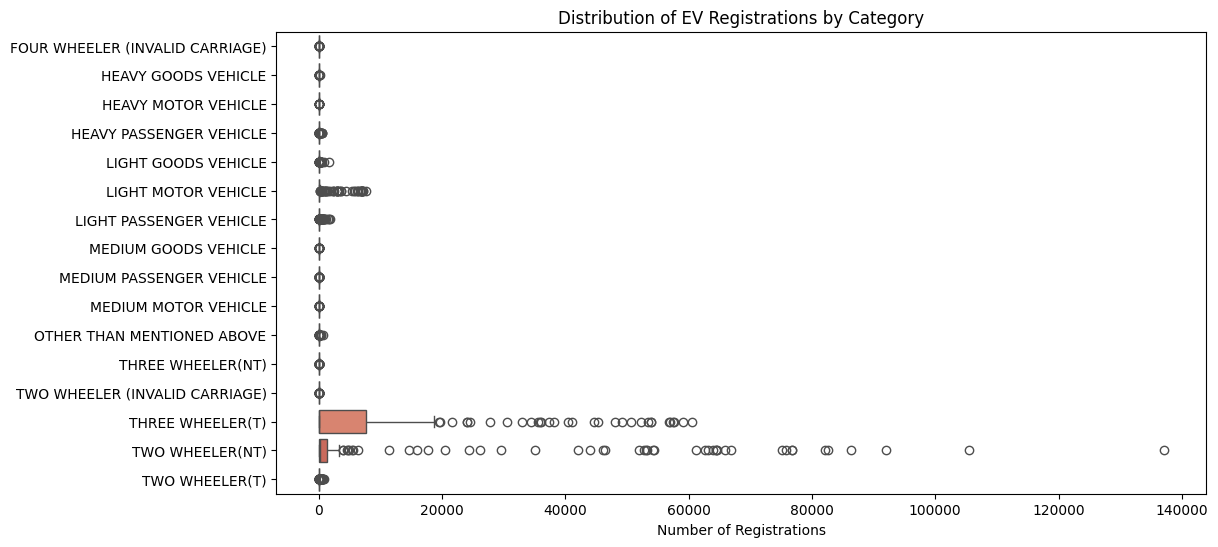

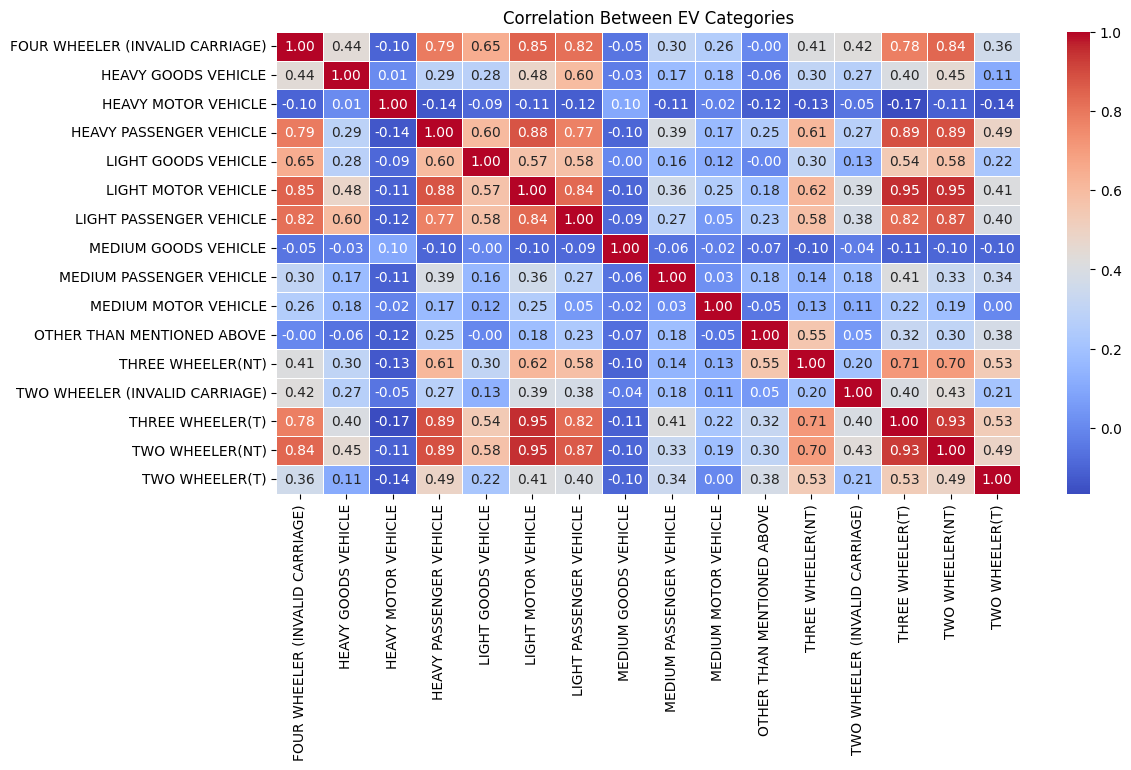

In [10]:
# Convert 'Date' column to datetime
df2["Date"] = pd.to_datetime(df2["Date"])

# Set 'Date' as index for time series analysis
df2.set_index("Date", inplace=True)

# Plot Time Series Trends
plt.figure(figsize=(12, 6))
df2[["LIGHT MOTOR VEHICLE", "TWO WHEELER(NT)", "THREE WHEELER(T)"]].plot(figsize=(12, 6))
plt.title("EV Registration Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Registrations")
plt.legend(title="Vehicle Type")
plt.grid(True)
plt.show()

# Category-wise Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, orient="h", palette="coolwarm")
plt.title("Distribution of EV Registrations by Category")
plt.xlabel("Number of Registrations")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between EV Categories")
plt.show()


The **Time Series Trends** reveal that "Two Wheeler (NT)" has the highest number of registrations, showing significant fluctuations over time. Additionally, "Three Wheeler (T)" and "Light Motor Vehicles" also exhibit notable variations, indicating dynamic growth patterns in these categories.

In the **Category-wise Distribution**, some vehicle types display extreme outliers, particularly "Two Wheeler (NT)" and "Three Wheeler (T)," suggesting high variability in their adoption. On the other hand, categories like "Medium Goods Vehicle" have lower median values, indicating more stable registration numbers.

The **Correlation Heatmap** highlights strong relationships between similar vehicle types, such as "Light Motor Vehicle" and "Light Passenger Vehicle." Additionally, some unexpected correlations suggest emerging trends in EV adoption across different segments, pointing to evolving market dynamics.

# K-Means clustering algorithm

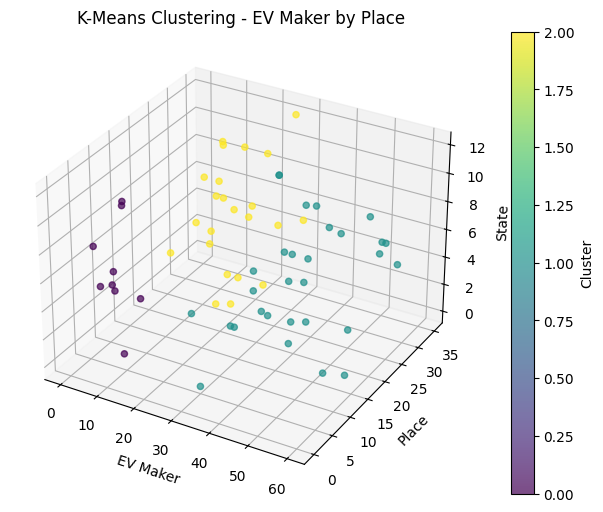

In [11]:
# Load datasets
df1 = pd.read_csv("EV Maker by Place.csv")
df2 = pd.read_csv("ev_cat_01-24_2.csv")

# --- Preprocessing the first dataset (EV Maker by Place) ---
df1_encoded = df1.copy()
label_encoders = {}
for col in ["EV Maker", "Place", "State"]:
    le = LabelEncoder()
    df1_encoded[col] = le.fit_transform(df1[col])
    label_encoders[col] = le

# Applying K-Means clustering
kmeans1 = KMeans(n_clusters=3, random_state=42, n_init=10)
df1_encoded["Cluster"] = kmeans1.fit_predict(df1_encoded)

# --- Visualization for "EV Maker by Place" ---
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df1_encoded["EV Maker"], df1_encoded["Place"], df1_encoded["State"], 
                     c=df1_encoded["Cluster"], cmap='viridis', alpha=0.7)
ax.set_xlabel("EV Maker")
ax.set_ylabel("Place")
ax.set_zlabel("State")
ax.set_title("K-Means Clustering - EV Maker by Place")
plt.colorbar(scatter, ax=ax, label="Cluster")
plt.show()


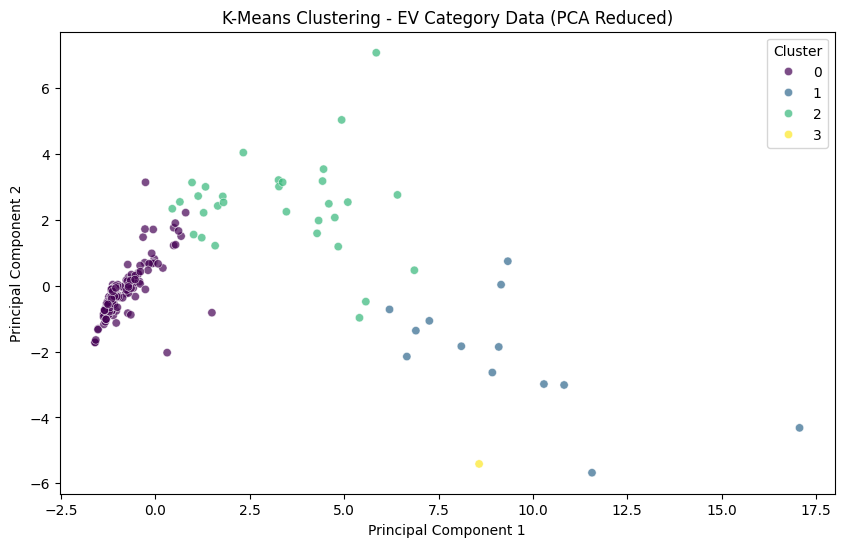

In [12]:

# --- Preprocessing the second dataset (EV category data) ---
df2_numeric = df2.drop(columns=["Date"])  # Removing the date column

# Standardizing the numeric data
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2_numeric)

# Applying K-Means clustering
kmeans2 = KMeans(n_clusters=4, random_state=42, n_init=10)
df2["Cluster"] = kmeans2.fit_predict(df2_scaled)

# --- Visualization for "EV Category Data" using PCA ---
pca = PCA(n_components=2)  # Reduce to 2D for visualization
df2_pca = pca.fit_transform(df2_scaled)
df2_pca_df = pd.DataFrame(df2_pca, columns=["PCA1", "PCA2"])
df2_pca_df["Cluster"] = df2["Cluster"].values

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df2_pca_df, palette="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering - EV Category Data (PCA Reduced)")
plt.legend(title="Cluster")
plt.show()
